In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict

# 1. 데이터 분포 확인

In [ ]:
path="./gdrive/My Drive/Colab Notebooks/(록스)mitbih_database"
#path="./(록스)mitbih_database/"
classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=='csv':
        records.append(path+"/"+f)
records.sort()
annotations.sort()
#display(records)
#display(annotations)

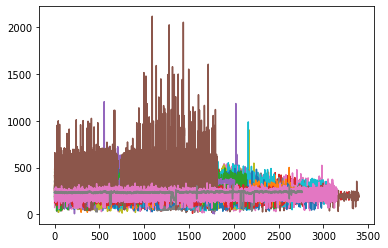

In [ ]:
avg_list=[]
names=[]
for i in range(len(annotations)):
    names.append(annotations[i].split('/')[-1].split('.')[0].split('a')[0])
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    a_list=[]
    for i in range(3,len(lines)):
        now=list(filter(None,lines[i].split(" ")))[1]
        before=list(filter(None,lines[i-1].split(" ")))[1]
        a_list.append(int(now)-int(before))

    plt.plot(range(0,len(a_list)),a_list)

    a_array=np.array(a_list)
    avg=np.mean(a_array)
    avg_list.append(avg)

■■■ 인원별 평균 비트의 길이 : 287.324873424873 ■■■


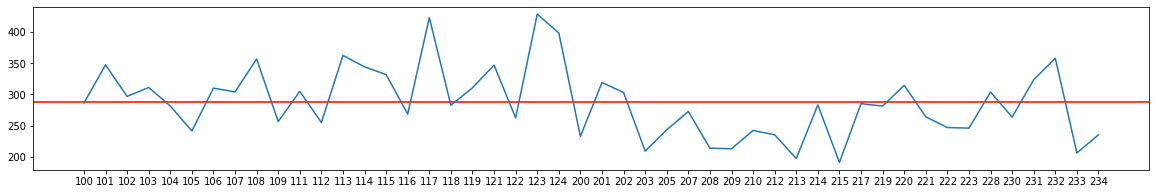

In [ ]:
print("■■■ 인원별 평균 비트의 길이 :",sum(avg_list)/len(avg_list),"■■■")
plt.figure(figsize=(20, 3))
plt.axhline(y=sum(avg_list)/len(avg_list), xmin=0, xmax=1,color='red')
plt.plot(names,avg_list)

In [ ]:
records[1]

'./gdrive/My Drive/Colab Notebooks/(록스)mitbih_database/101.csv'

In [ ]:
person_aux_detection=defaultdict(int)
class_aux_dectection=defaultdict(int)

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
#maximum_counting=10000
X,Y=[],[]

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    signals=[]
    if records[i].split('/')[-1]=="231.csv":
      continue
    try:
        signals.extend(record.iloc[:,1].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        signals.extend(record.iloc[:,1].to_list())
        print(record.columns[0])
        continue

    beat=[]
    a=[]
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for j in range(3,len(lines)): # 1번 ~ 2번: 시작 지점이라 이상함
        now_tmp=list(filter(None,lines[j].split(" ")))
        # AUX 부분에 이상한 것 있으면 확인
        if now_tmp[-1] != '0\n':
            #print(records[i],":",now_tmp[-1].split("\t")[1])
            person_aux_detection[records[i].split('/')[-1].split('.')[0]]+=1
            class_aux_dectection[now_tmp[-1].split("\t")[1]]+=1
        before_tmp=list(filter(None,lines[j-1].split(" ")))
        now_num_sample=int(now_tmp[1])
        before_num_sample=int(before_tmp[1])
        beat_type=now_tmp[2]
        if (beat_type in classes):
            beat_idx=classes.index(beat_type)
            count_classes[beat_idx]+=1
            beat=signals[before_num_sample:now_num_sample]
            X.append(beat)
            Y.append(beat_idx)

In [ ]:
print(len(X))
print(len(Y))

105475
105475


In [ ]:
df_class_aux_dectection = pd.DataFrame([(k.split('\n')[0],v) for k,v in class_aux_dectection.items()],columns=['class','aux_num'])
df_person_aux_detection = pd.DataFrame([(k, v) for k, v in person_aux_detection.items()], columns=['id', 'aux_num'])
display(df_class_aux_dectection)
display(df_person_aux_detection)

,class,aux_num
0,(N,489
1,(P,56
2,(B,219
3,(VT,61
4,(T,83
5,(SVTA,26
6,(NOD,36
7,(IVR,4
8,(AFIB,102
9,(AFL,45


,id,aux_num
0,102,4
1,104,44
2,106,40
3,114,2
4,119,102
5,124,12
6,200,147
7,201,34
8,202,7
9,203,44


In [ ]:
print("전체 X 값 :",len(X))
print("Aux 값 찍힌곳 :",sum(list(df_class_aux_dectection.iloc[:,1])))
print("비율 :",round((sum(list(df_class_aux_dectection.iloc[:,1]))/len(X))*100,2))

전체 X 값 : 105475
Aux 값 찍힌곳 : 1243
비율 : 1.18


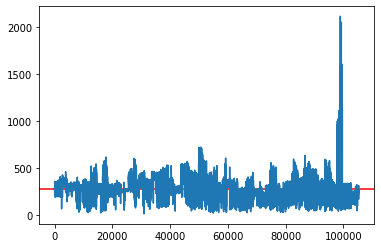

In [ ]:
X_len=[len(x) for x in X]
plt.axhline(y=sum(X_len)/len(X_len), xmin=0, xmax=1, color='red')
plt.plot(range(0,len(X_len)),X_len)

데이터의 개수 105475
평균 279.9819862526665
분산 6228.144524995307
표준 편차 78.91859429181001
최대값 2114
최소값 11
중앙값 272.0
1사분위 234.0
2사분위 272.0
3사분위 317.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1 시그마 적용: 0.7294145532116615
2 시그마 적용: 0.9600094809196492


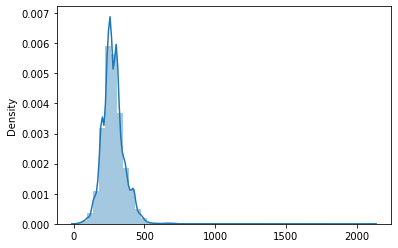

In [ ]:
import seaborn as sns
len_x=[len(x) for x in X]

print("데이터의 개수",len(len_x)) # 데이터의 개수
print("평균",np.mean(len_x)) # 평균
print("분산",np.var(len_x)) # 분산
print("표준 편차",np.std(len_x)) # 표준 편차
print("최대값",np.max(len_x)) # 최대값
print("최소값",np.min(len_x)) # 최소값
print("중앙값",np.median(len_x)) # 중앙값
print("1사분위",np.percentile(len_x, 25)) # 1사분위 수
print("2사분위",np.percentile(len_x, 50)) # 2사분위 수 = 중앙값
print("3사분위",np.percentile(len_x, 75)) # 3사분위 수

sns.distplot(len_x)

upper=np.mean(len_x)+np.std(len_x)
lower=np.mean(len_x)-np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1

print("1 시그마 적용:",cnt/len(len_x))
upper=np.mean(len_x)+2*np.std(len_x)
lower=np.mean(len_x)-2*np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1
print("2 시그마 적용:",cnt/len(len_x))

## 결론
### 1) 2시그마 범위 안에 97%가 포함되므로 비트 단위를 mean + 2sigma로 표현한다.
### 2) window size/2를 mean+2sigma로 활용한다.

In [ ]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        print(classes[Y[i]])
print(np.shape(X))

(105475,) (105475,)
N
A
V
/
L
R
(105475,)


# 2. 데이터 전처리

In [ ]:
window_size = int((np.mean(len_x)+2*np.std(len_x))/2)
print("window size: ",window_size)
maximum_counting = 100000

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=="csv":
        records.append(path+"/"+f)
annotations.sort()
records.sort()

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for line in lines[1:]: #lines의 0은 Header
        tmp=line.split(' ')
        tmp=filter(None, tmp)
        next(tmp)
        pos=int(next(tmp))
        arrhythmia_type=next(tmp)
        if (arrhythmia_type in classes):
            arrhythmia_index=classes.index(arrhythmia_type)
            if count_classes[arrhythmia_index]> maximum_counting:
                continue
            else:
                count_classes[arrhythmia_index]+=1
                if (window_size<pos and pos<(len(signals)-window_size)): 
                    beat=signals[pos-window_size+1:pos+window_size] #beat size
                    X.append(beat)
                    Y.append(arrhythmia_index)

window size:  218
102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


## 2-1. 데이터 shape

(103346, 435) (103346,)
N
A
V
/
L
R


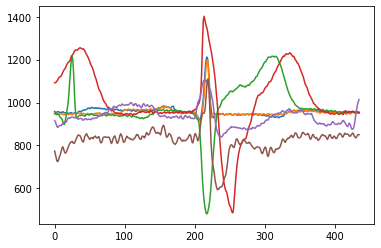

In [ ]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        plt.plot(X[i])
        print(classes[Y[i]])

In [ ]:
# X 배열 끝에 Y값 삽입
for i in range(len(X)):
    X[i].append(Y[i])
    
X_train_df = pd.DataFrame(X)
#각각의 beat type의 count
per_class=X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class) #V5 포함했을 때와 비교했을 때 '5'의 카운트가 크게 차이남

0    74738
1     8070
2     7253
4     7122
5     3618
3     2545
Name: 435, dtype: int64


## 2-2. Resampling
### 5000 이상 : 중복 X   // 5000 이하 : 중복 O

In [ ]:
from sklearn.utils import resample

resampled_X_train_df=pd.DataFrame()
for name, group in X_train_df.groupby(X_train_df[X_train_df.shape[1]-1]):
    if len(group)>5000:
        tmp=resample(group,replace=False,n_samples=5000, random_state=880818)
    else:
        tmp=resample(group,replace=True, n_samples=5000, random_state=880818)
    print(len(tmp))
    resampled_X_train_df=pd.concat([resampled_X_train_df,tmp])
print(len(resampled_X_train_df))
resampled_X_train_df

5000
5000
5000
5000
5000
5000
30000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435
5498,1029,1028,1025,1028,1029,1028,1025,1023,1018,1017,1017,1013,1006,1002,998,995,992,989,986,982,978,978,977,975,972,970,968,967,968,970,967,966,964,964,965,965,966,966,964,966,...,973,973,970,969,972,969,968,966,965,967,967,967,966,965,963,963,964,964,962,961,958,961,962,960,961,959,959,960,961,960,958,957,955,958,962,961,960,958,956,0
54840,961,962,963,964,965,964,965,964,962,962,963,964,965,967,968,967,969,967,968,968,964,964,964,966,967,968,970,970,968,970,969,967,967,967,968,967,966,969,973,969,...,959,957,962,962,962,961,960,959,959,958,959,959,961,959,962,962,963,962,959,960,958,957,957,959,960,961,961,962,962,963,959,959,958,958,957,961,964,968,970,0
80571,795,792,786,781,778,776,773,771,768,767,763,761,757,759,759,761,761,762,763,763,765,770,775,780,786,794,803,808,819,825,833,837,842,843,845,849,849,851,857,858,...,898,899,898,901,902,902,903,903,902,900,898,897,893,893,893,896,897,899,900,900,900,901,900,899,898,898,901,903,904,906,907,910,911,911,912,910,908,908,906,0
43853,993,996,998,999,998,995,998,999,999,999,999,997,1000,1000,1003,1001,999,995,994,997,998,1003,1008,1012,1018,1014,1007,991,973,966,965,967,974,980,984,985,984,987,990,990,...,1022,1022,1022,1018,1019,1018,1019,1020,1024,1023,1022,1022,1024,1028,1032,1033,1031,1031,1032,1034,1037,1038,1041,1043,1048,1048,1041,1033,1025,1021,1020,1020,1024,1032,1036,1038,1036,1027,1022,0
49687,985,989,991,986,986,989,993,994,997,997,996,998,1000,1002,1005,998,998,996,997,999,998,994,989,985,987,987,986,981,978,978,981,988,989,986,983,984,985,989,988,985,...,963,968,967,965,961,962,962,963,966,963,961,963,965,963,965,966,962,963,963,967,965,961,960,963,964,968,968,970,970,969,974,980,981,981,975,973,976,974,977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76899,1149,1160,1168,1170,1169,1167,1170,1174,1181,1180,1181,1186,1187,1195,1200,1205,1206,1208,1210,1216,1222,1225,1224,1226,1229,1233,1235,1236,1236,1234,1233,1233,1236,1237,1231,1233,1230,1228,1226,1223,...,995,1000,1001,1002,997,995,993,991,997,997,993,988,992,992,993,990,987,986,984,985,987,986,983,979,980,982,984,983,980,978,979,981,985,985,982,982,983,985,988,5
78270,1043,1048,1054,1052,1052,1049,1057,1063,1068,1070,1069,1073,1076,1080,1086,1085,1091,1093,1100,1107,1116,1121,1125,1128,1139,1146,1156,1160,1163,1168,1172,1178,1184,1188,1188,1197,1199,1206,1210,1213,...,971,971,977,974,971,969,969,971,975,973,970,966,969,970,970,969,968,963,964,964,967,962,960,958,957,956,957,957,953,953,952,955,957,960,957,958,961,964,962,5
12208,1180,1185,1190,1197,1205,1211,1219,1222,1229,1235,1244,1251,1256,1261,1265,1270,1274,1281,1284,1286,1290,1295,1300,1302,1303,1303,1305,1306,1310,1314,1318,1318,1318,1322,1322,1322,1319,1315,1309,1307,...,940,936,935,935,937,939,940,935,935,936,938,937,935,935,933,933,939,940,939,937,936,939,939,940,938,940,937,936,942,944,945,945,942,940,941,943,944,945,944,5
12072,1001,1007,1012,1012,1013,1018,1019,1018,1024,1034,1042,1049,1055,1058,1063,1072,1079,1083,1093,1096,1100,1103,1104,1107,1110,1114,1116,1121,1128,1131,1139,1139,1136,1134,1136,1142,1143,1143,1141,1137,...,878,874,875,877,881,884,888,886,889,888,891,898,904,905,914,921,928,932,935,932,929,931,936,949,954,946,937,926,921,925,928,935,939,937,937,940,940,938,937,5


# 3. Modeling

## 3-1. Set 분할

각 beat type별로 균등하게 Set 분할 실시

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

train, test=train_test_split(resampled_X_train_df,test_size=0.20)
print("X_train : ",len(train))
print("X_test : ",len(test))
print(type(test))
test.iloc[:,-1].value_counts()
test

X_train :  24000
X_test :  6000
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435
25113,979,981,980,980,985,989,993,997,995,997,1005,1013,1021,1023,1025,1027,1034,1042,1045,1047,1047,1049,1052,1052,1056,1054,1050,1050,1049,1053,1053,1052,1044,1043,1044,1046,1049,1045,1039,1039,...,1021,1019,1018,1017,1018,1022,1019,1018,1016,1012,1013,1014,1016,1016,1013,1014,1013,1016,1016,1014,1011,1010,1013,1013,1014,1016,1013,1011,1013,1017,1015,1013,1012,1011,1012,1015,1016,1008,1010,0
77174,1072,1073,1077,1081,1088,1087,1089,1087,1091,1095,1099,1103,1105,1108,1112,1118,1123,1125,1126,1131,1135,1144,1147,1148,1149,1152,1157,1163,1166,1171,1171,1172,1175,1178,1181,1184,1181,1179,1178,1183,...,857,855,858,860,861,858,854,855,858,861,862,862,861,860,862,866,867,865,864,865,867,866,868,865,862,858,859,863,864,864,862,862,864,863,867,866,862,862,865,5
9665,961,965,967,971,973,973,978,984,989,994,997,1003,1014,1026,1039,1037,1032,1033,1031,1026,1018,1015,1014,1009,999,989,983,985,978,974,971,970,970,970,967,968,973,975,978,982,...,969,970,970,968,965,962,962,964,966,965,961,962,961,964,964,963,963,960,963,964,965,959,954,957,963,966,965,962,959,958,959,958,959,959,960,959,961,962,964,4
96841,1003,1004,1006,1004,1004,1004,1007,1007,1007,1007,1006,1009,1010,1007,1009,1010,1011,1013,1014,1013,1011,1007,1006,1008,1007,1012,1014,1021,1023,1023,1022,1023,1023,1023,1024,1025,1027,1026,1030,1032,...,1005,1007,1009,1008,1010,1010,1006,1006,1006,1004,1003,1003,1006,1008,1010,1009,1011,1010,1008,1009,1005,1003,999,1001,1002,1001,1002,1002,1008,1008,1006,1009,1006,1005,1003,1002,1003,1002,1003,3
33355,819,818,821,818,820,819,818,819,820,825,829,834,836,837,842,847,848,851,854,855,857,862,870,871,878,880,881,880,882,883,884,884,886,890,893,896,895,895,895,892,...,892,891,891,889,888,885,881,882,884,887,887,888,892,893,892,889,888,888,888,887,888,890,892,895,890,891,889,887,886,884,886,888,895,896,897,898,898,897,898,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043,1061,1063,1064,1062,1059,1060,1061,1063,1060,1057,1055,1056,1053,1053,1050,1046,1044,1046,1045,1045,1043,1038,1037,1039,1039,1039,1038,1035,1030,1031,1028,1031,1032,1026,1022,1022,1021,1023,1018,1018,...,1016,1017,1014,1011,1010,1010,1012,1013,1007,1004,1003,1005,1005,1007,1008,1005,1005,1008,1008,1005,1003,1005,1002,1005,1008,1007,1005,999,1002,1005,1001,1004,1004,1004,1004,1005,1003,1002,997,1
97800,1037,1031,1027,1026,1026,1027,1034,1038,1036,1031,1025,1017,1011,1004,998,993,989,989,983,984,982,980,977,975,975,976,977,977,977,974,971,975,974,974,974,974,971,968,971,980,...,967,965,965,965,967,970,970,971,972,971,971,971,969,973,978,979,987,991,995,998,998,997,997,1000,1003,1009,1017,1022,1028,1028,1027,1024,1020,1017,1018,1020,1019,1021,1021,4
453,938,937,937,940,942,942,941,939,936,938,939,940,940,938,936,938,941,940,938,936,936,936,938,939,939,936,936,939,939,939,938,938,937,938,940,938,938,938,935,936,...,962,959,959,964,969,970,971,972,972,974,977,976,976,973,970,974,978,980,983,980,977,980,981,982,979,980,979,982,983,987,985,985,983,986,991,993,986,976,970,0
10878,1025,1025,1027,1033,1044,1057,1066,1072,1071,1074,1077,1082,1084,1088,1092,1102,1107,1111,1119,1128,1138,1143,1144,1148,1152,1156,1163,1165,1167,1170,1171,1173,1180,1183,1186,1188,1184,1184,1186,1184,...,984,975,970,966,963,958,954,948,944,939,933,931,927,926,925,924,922,919,915,915,915,914,915,915,915,913,911,913,913,913,911,912,914,915,915,915,916,917,917,5


In [ ]:
cate=resampled_X_train_df.groupby(435)
train=pd.DataFrame([],columns=resampled_X_train_df.columns)
test=pd.DataFrame([],columns=resampled_X_train_df.columns)

for i in range(len(classes)):
  tmp_df=cate.get_group(i)
  tmp_train, tmp_test=train_test_split(tmp_df,test_size=0.20)
  train=pd.concat([train,tmp_train])
  test=pd.concat([test,tmp_test])
test.iloc[:,-1].value_counts()
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435
22840,1073,1077,1079,1083,1087,1095,1102,1103,1105,1108,1114,1117,1126,1130,1129,1132,1135,1142,1148,1147,1142,1141,1139,1135,1130,1122,1109,1096,1089,1079,1071,1062,1051,1037,1030,1022,1017,1007,998,991,...,957,955,953,950,950,952,955,954,951,946,948,953,954,953,950,949,948,952,950,950,950,946,947,949,953,951,949,947,946,948,952,952,948,947,948,948,948,949,950,0
26179,929,926,923,918,916,914,905,904,901,900,898,895,891,886,880,881,876,873,871,868,868,868,868,868,865,863,863,860,858,859,859,858,859,861,860,860,859,860,855,857,...,856,855,855,852,851,849,851,851,852,855,858,859,858,860,857,858,856,857,856,855,855,857,857,859,859,859,855,850,847,845,846,849,850,851,852,856,854,853,849,0
81052,933,936,938,942,945,949,952,953,950,951,948,947,943,943,943,943,942,943,941,937,932,926,925,921,920,916,917,918,921,919,916,915,914,909,905,903,905,902,906,909,...,911,913,912,914,916,916,915,914,912,910,907,905,904,904,906,906,907,908,906,902,901,900,898,897,897,894,894,895,898,897,896,899,896,893,891,890,887,888,889,0
100671,969,968,964,958,951,946,941,944,943,945,949,951,949,948,947,945,945,945,943,944,945,944,951,949,948,946,945,945,945,945,946,946,947,949,951,948,946,948,948,948,...,975,977,979,980,983,985,991,992,992,994,995,993,992,990,987,986,983,978,978,972,971,969,970,966,963,960,956,952,949,946,946,949,950,951,953,950,947,948,944,0
23124,966,965,963,962,967,968,967,964,961,963,967,967,964,961,962,963,968,970,968,966,963,965,970,970,971,967,967,966,969,970,969,966,965,967,966,967,970,968,965,964,...,967,962,959,963,964,968,964,964,962,963,965,965,962,961,959,960,963,966,962,962,960,959,962,963,961,958,959,958,961,966,963,957,956,954,955,959,958,957,956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10921,1086,1089,1091,1093,1098,1103,1110,1114,1119,1123,1127,1136,1140,1144,1147,1150,1159,1165,1171,1175,1177,1179,1185,1192,1198,1201,1204,1204,1204,1212,1214,1214,1213,1211,1212,1214,1215,1214,1209,1204,...,892,893,890,888,888,887,887,888,886,884,886,889,890,889,889,889,889,889,891,893,892,889,890,893,897,895,890,888,892,898,897,896,895,893,893,895,901,898,897,5
10826,1109,1114,1122,1127,1132,1136,1137,1141,1149,1157,1162,1170,1174,1176,1185,1193,1199,1201,1207,1212,1218,1223,1230,1232,1236,1238,1240,1246,1244,1246,1243,1243,1246,1247,1245,1240,1238,1233,1232,1229,...,1034,1026,1018,1014,1013,1009,1005,1004,1006,1004,1002,994,990,985,983,982,977,972,967,958,954,950,944,940,930,930,931,934,931,929,923,915,916,917,918,915,913,913,914,5
77900,1055,1060,1061,1060,1060,1068,1073,1076,1075,1078,1081,1087,1093,1094,1095,1096,1100,1104,1109,1115,1117,1118,1127,1131,1136,1142,1145,1147,1153,1161,1170,1177,1181,1182,1187,1193,1199,1201,1201,1205,...,979,979,978,978,980,981,985,982,976,976,977,977,980,979,971,972,970,974,977,975,974,971,970,972,977,976,972,970,969,970,973,973,971,967,966,966,967,966,963,5
12941,1053,1058,1059,1064,1067,1075,1081,1086,1091,1093,1096,1106,1116,1120,1127,1130,1135,1137,1146,1151,1154,1157,1163,1167,1173,1175,1175,1175,1177,1177,1178,1181,1178,1175,1174,1174,1173,1167,1163,1159,...,938,935,933,930,931,931,934,932,931,927,926,928,930,929,927,925,924,926,927,927,926,926,927,930,929,931,928,927,928,928,931,932,931,930,929,929,931,930,930,5


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print("Y shape :",np.shape(y_train),np.shape(y_test))

x_train=train.iloc[:,:train.shape[1]-1].values
x_test=test.iloc[:,:test.shape[1]-1].values
x_train=x_train.reshape(len(x_train),x_train.shape[1],1)
x_test=x_test.reshape(len(x_test),x_test.shape[1],1)
print("X shape :",np.shape(x_train),np.shape(x_test))

Y shape : (24000, 6) (6000, 6)
X shape : (24000, 435, 1) (6000, 435, 1)


## 3-2. 모델 학습

In [ ]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix

In [ ]:
x_test=x_test.reshape(len(x_test),x_test.shape[1])
display(np.shape(x_test))

x_train=x_train.reshape(len(x_train),x_train.shape[1])
np.shape(x_train)

(6000, 435)

(24000, 435)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(x_train))
x_train = minMaxScaler.transform(x_train)
x_test = minMaxScaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
def network(x_train,y_train,x_test,y_test):
    im_shape=(x_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape),name='inputs_cnn')
    
    #conv. layer 1
    conv1_1=Convolution1D(64,(6),activation="elu",input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3),strides=(2),padding="same")(conv1_1)
    #conv. layer 2
    conv2_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    #conv. layer 3
    conv3_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv3_1)
    #conv. layer 4
    conv4_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    #conv. layer 5
    conv5_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv5_1)
    #flattened layer 1
    flatten=Flatten()(pool3)
    #dense layers
    dense_end1=Dense(1024,activation='elu')(flatten)
    
    #output layers
    main_output=Dense(6,activation='softmax',name='main_output')(dense_end1)
    
    model=Model(inputs=inputs_cnn,outputs=main_output)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', precision, recall, f1score])
    
    callbacks=[EarlyStopping(monitor='val_loss',patience=2),
              ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]
    
    history=model.fit(x_train, y_train, epochs=10, callbacks=callbacks, batch_size=32,validation_data=(x_test,y_test))
    model.load_weights('best_model.h5')
    return (model, history)

In [ ]:
def evaluate_model(history, X_test, y_test, model) :
    scores = model.evaluate((X_test), y_test, verbose = 0)
    print("Accuracy : %.2f%%" % (scores[1]*100))
    print("Accuracy : %.2f%%" % (scores[-1]*100))
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_name = ['0', '1', '2', '3', '4', '5']
    
    y_true = []
    for element in y_test :
        y_true.append(np.argmax(element))
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis = 1)
    cnf_matrix = confusion_matrix(y_true, prediction)

## 3-3. 모델 평가

### 1) Accuracy, F1 Score 평가

In [ ]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

Epoch 1/10
750/750 [==============================] - 311s 414ms/step - loss: 0.4829 - accuracy: 0.9106 - precision: 0.9214 - recall: 0.9008 - f1score: 0.9102 - val_loss: 0.1647 - val_accuracy: 0.9502 - val_precision: 0.9517 - val_recall: 0.9490 - val_f1score: 0.9503
Epoch 2/10
750/750 [==============================] - 318s 424ms/step - loss: 0.1378 - accuracy: 0.9581 - precision: 0.9605 - recall: 0.9563 - f1score: 0.9583 - val_loss: 0.2278 - val_accuracy: 0.9368 - val_precision: 0.9450 - val_recall: 0.9292 - val_f1score: 0.9369
Epoch 3/10
750/750 [==============================] - 313s 418ms/step - loss: 0.1213 - accuracy: 0.9655 - precision: 0.9673 - recall: 0.9641 - f1score: 0.9657 - val_loss: 0.2480 - val_accuracy: 0.9255 - val_precision: 0.9281 - val_recall: 0.9242 - val_f1score: 0.9261
Accuracy: 95.0166642665863
F1 score: 95.03202438354492
Accuracy : 95.02%
Accuracy : 95.03%


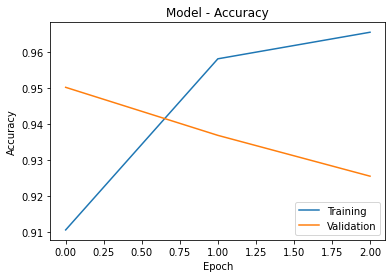

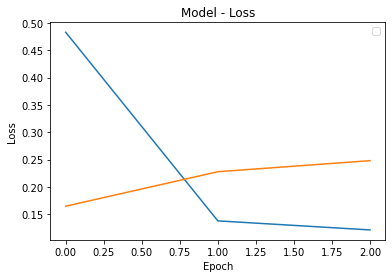

In [ ]:
model, history=network(x_train,y_train,x_test,y_test)
scores=model.evaluate((x_test),y_test,verbose=0)
print("Accuracy:",scores[1]*100)
print("F1 score:",scores[-1]*100)
evaluate_model(history, x_test, y_test, model)    
y_pred = model.predict(x_test)

### 2) Confusion Matrix

[[ 979    0    3   11    7    0]
 [  34  943    0    1   22    0]
 [  22    0  976    2    0    0]
 [ 146    2    3  848    1    0]
 [  11   11    8   15  955    0]
 [   0    0    0    0    0 1000]]


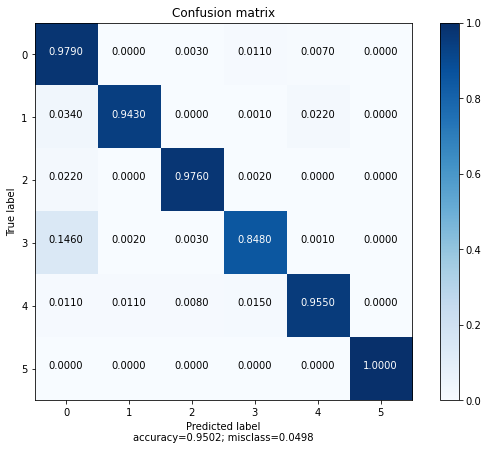

In [ ]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cnf_matrix, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix')

# 4. Clustering